# Diabetes Patients Prediction

Information about dataset attributes -

1. Pregnancies: To express the Number of pregnancies

2. Glucose: To express the Glucose level in blood

3. BloodPressure: To express the Blood pressure measurement

4. SkinThickness: To express the thickness of the skin

5. Insulin: To express the Insulin level in blood

6. BMI: To express the Body mass index

7. DiabetesPedigreeFunction: To express the Diabetes percentage

8. Age: To express the age

9. Outcome: To express the final result 1 is Yes and 0 is No

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# some stats behind the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

In [6]:
# columns in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# identifying null values in the dataset 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# shape of the dataset
df.shape

(768, 9)

In [9]:
# Data types of the given columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory Data Analysis (EDA)

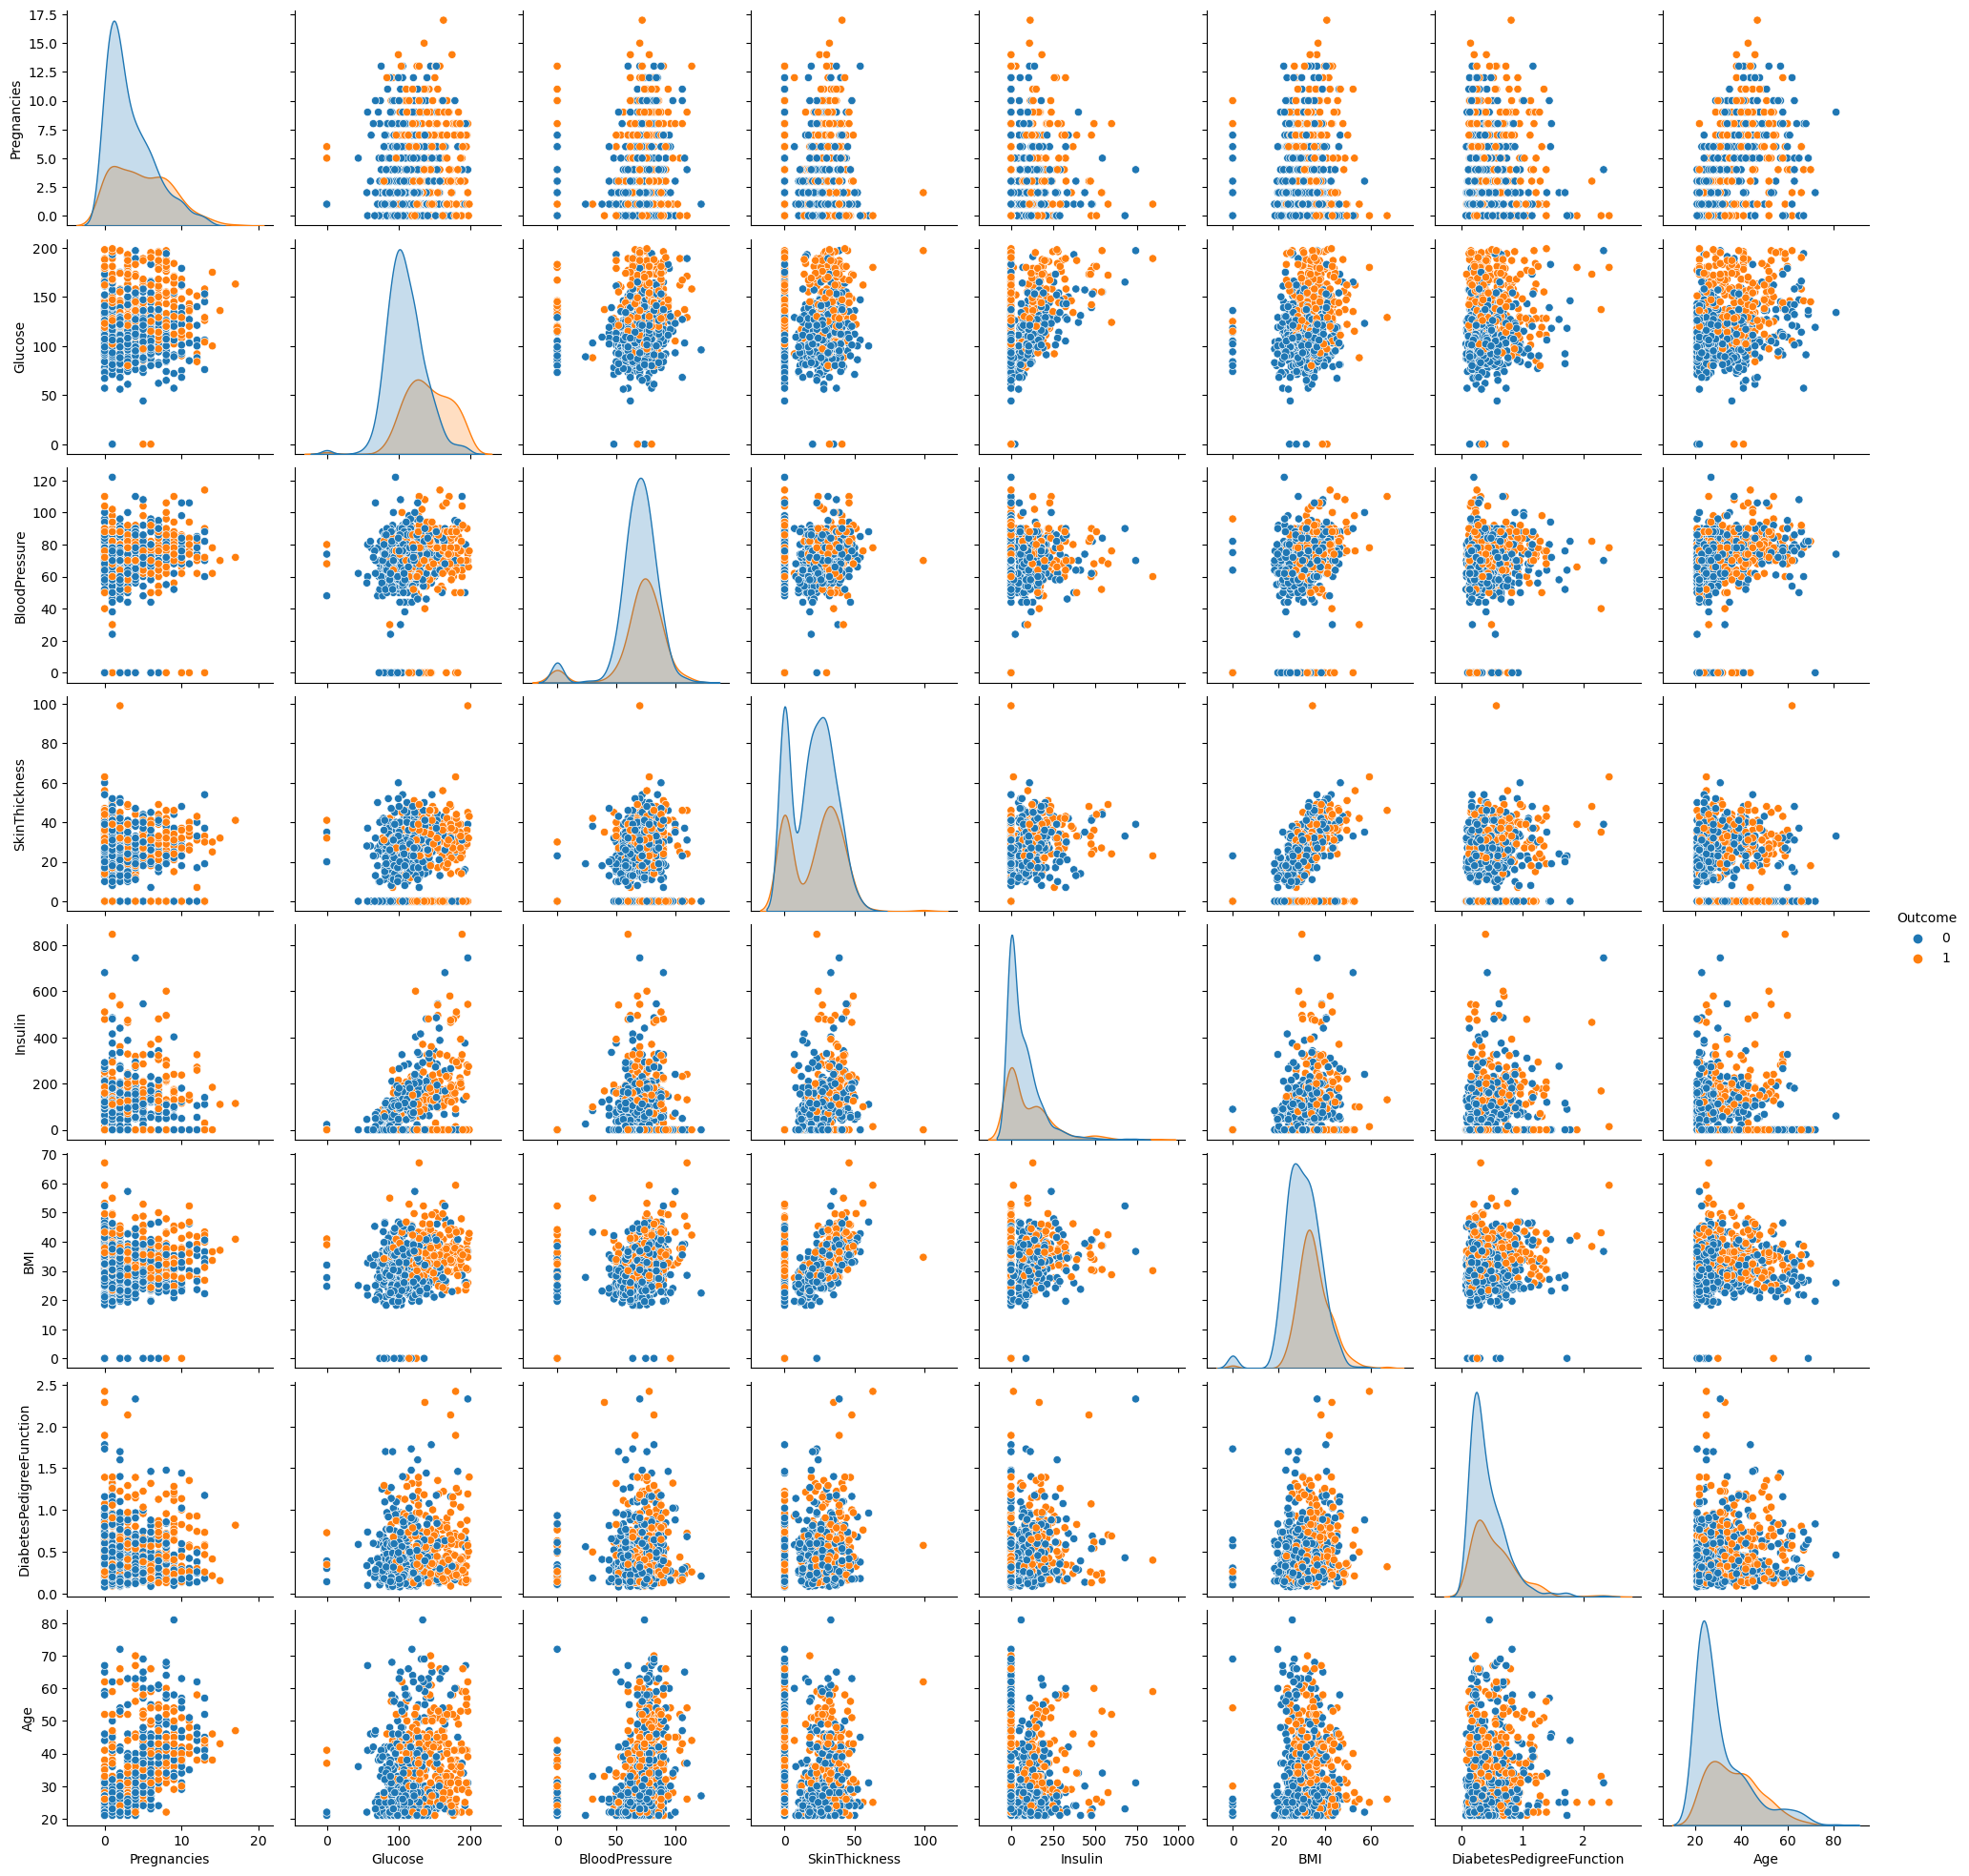

In [10]:
# some initial data visualization
sns.pairplot(data=df,hue='Outcome')

# Univariate Data Analysis

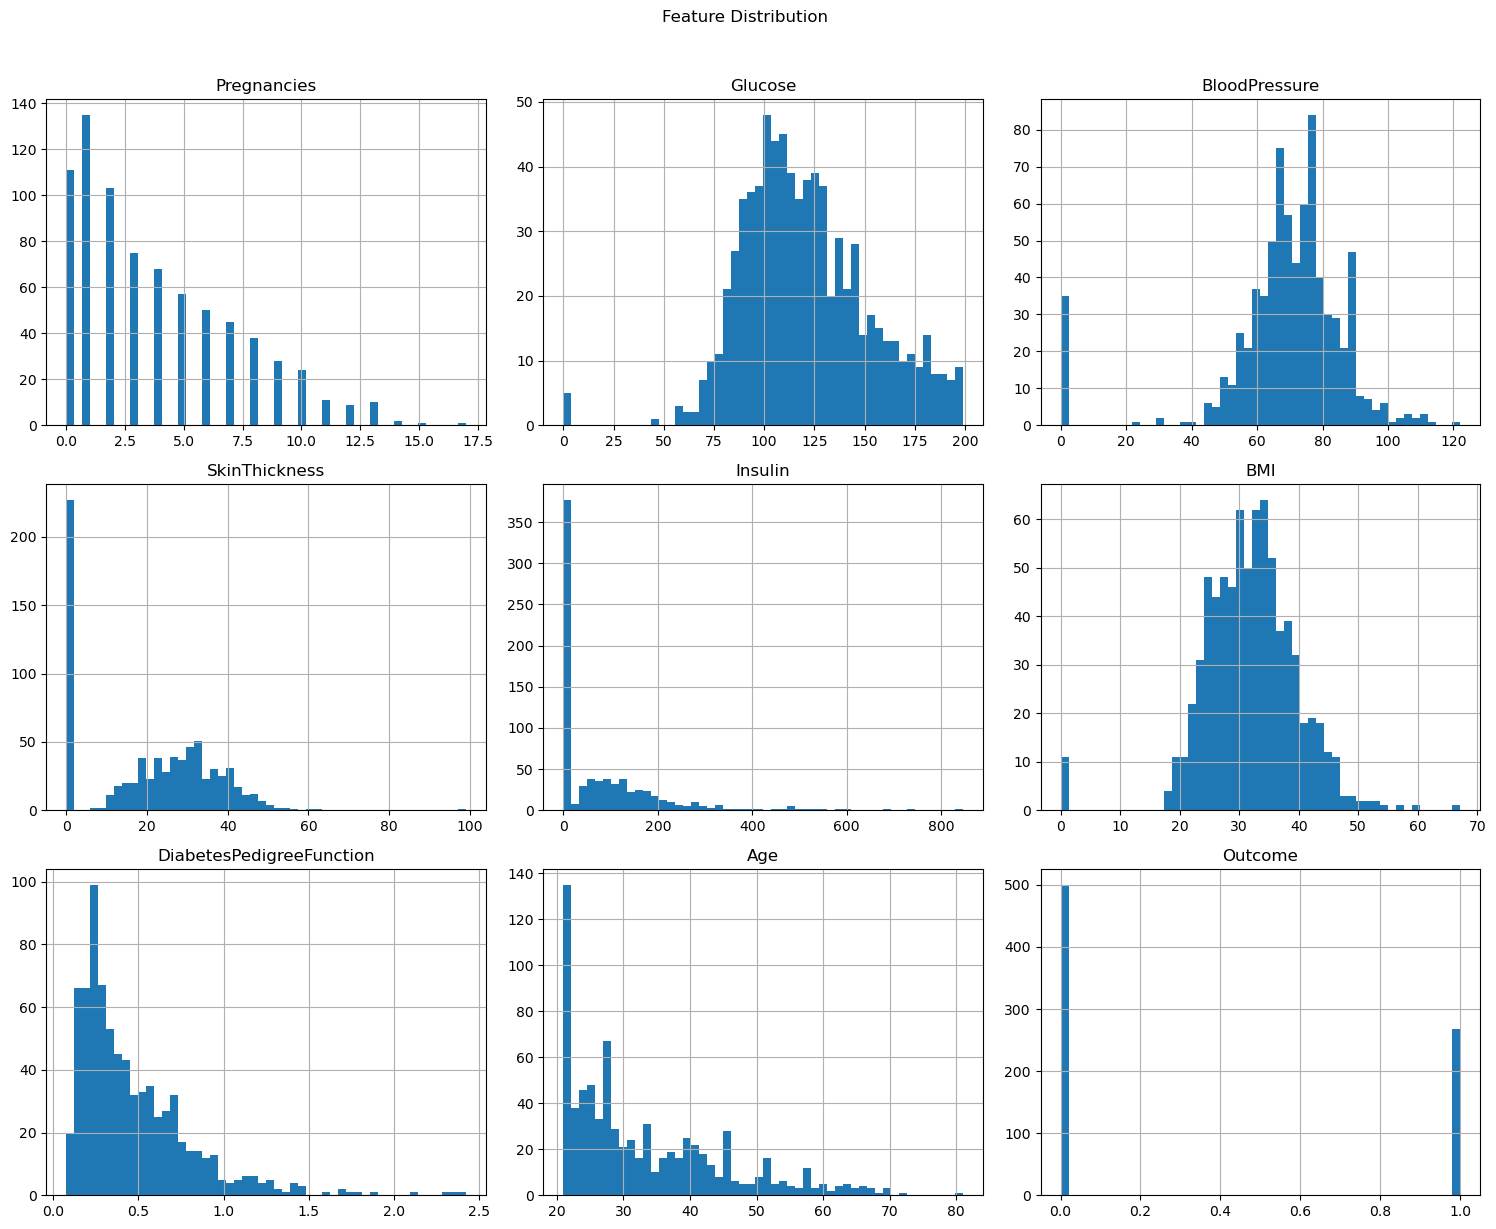

In [11]:
# feature distribution of the dataset

# plot all features present in the dataset
df.hist(bins=50,figsize=(15,12))

# add title with size and position 
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

# maintain perfect gaps between all plots
plt.tight_layout()

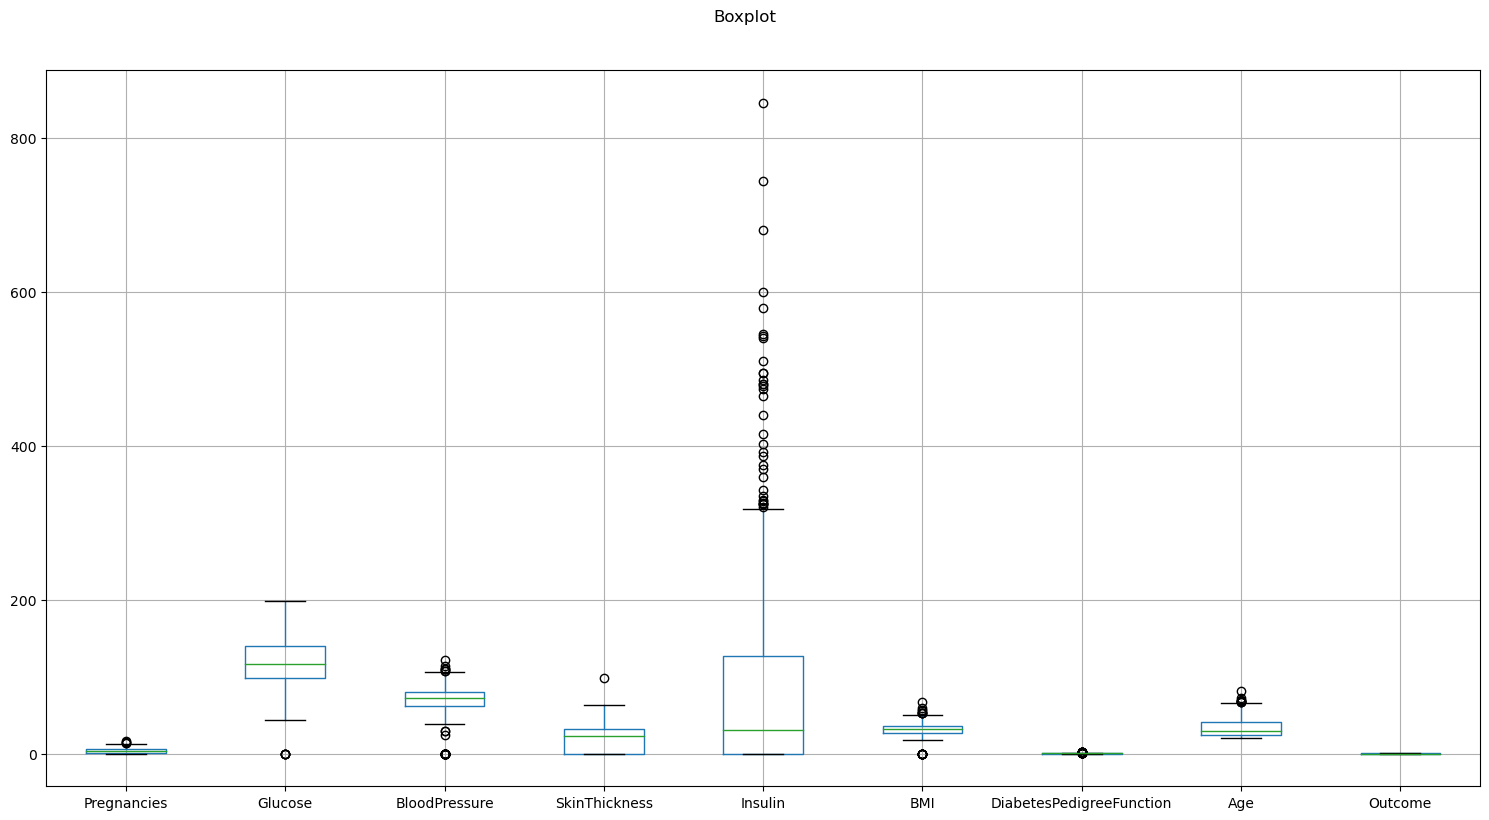

In [12]:
# boxplot of all the features

# create boxplot of all the features
df.boxplot(figsize=(15,8))

# add title with size and position
plt.suptitle('Boxplot',x=0.5,y=1.02,ha='center',fontsize='large')

# maintain perfect gaps between all plots
plt.tight_layout()

Outliers is present in the dataset

<AxesSubplot:xlabel='Outcome', ylabel='count'>

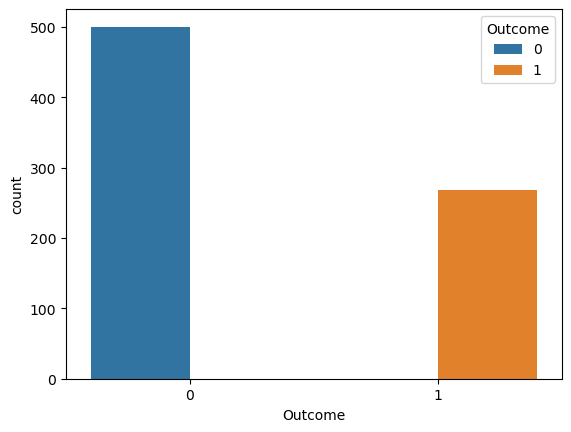

In [13]:
# count the values of different class (0 and 1) with the help of countplot
sns.countplot(data=df,x='Outcome',hue='Outcome')

# Bivariate Data Analysis

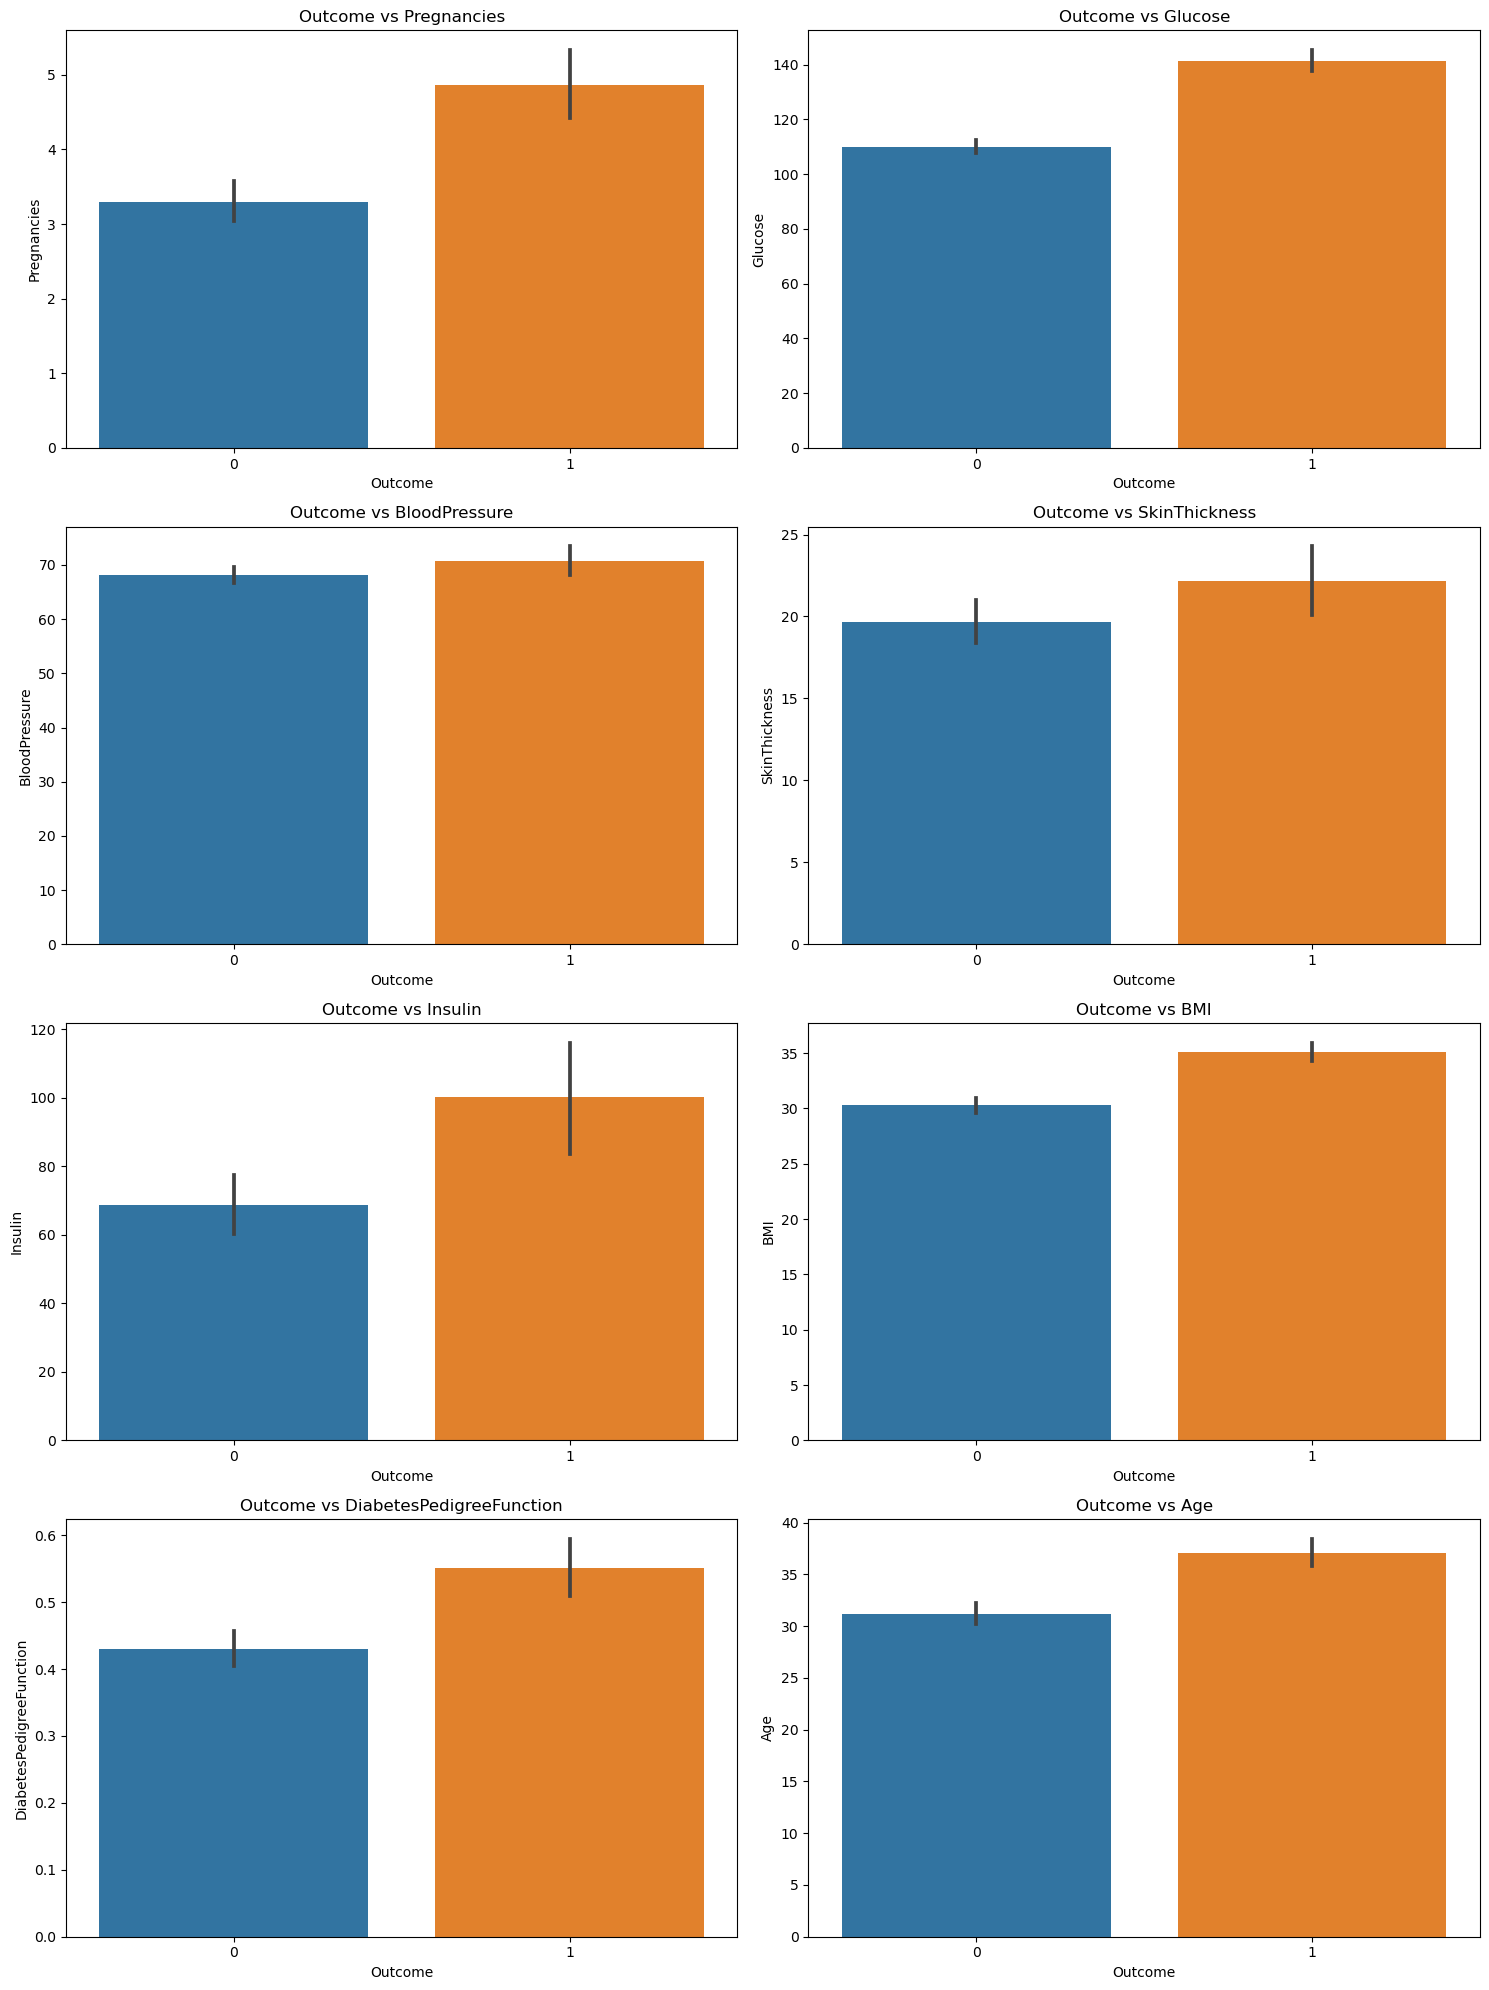

In [14]:
# create barplot for all the features w.r.t Outcome feature (0 and 1)

plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.barplot(data=df,x='Outcome',y='Pregnancies')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.barplot(data=df,x='Outcome',y='Glucose')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.barplot(data=df,x='Outcome',y='BloodPressure')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.barplot(data=df,x='Outcome',y='SkinThickness')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.barplot(data=df,x='Outcome',y='Insulin')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.barplot(data=df,x='Outcome',y='BMI')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.barplot(data=df,x='Outcome',y='DiabetesPedigreeFunction')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.barplot(data=df,x='Outcome',y='Age')
plt.title('Outcome vs Age')

plt.tight_layout()

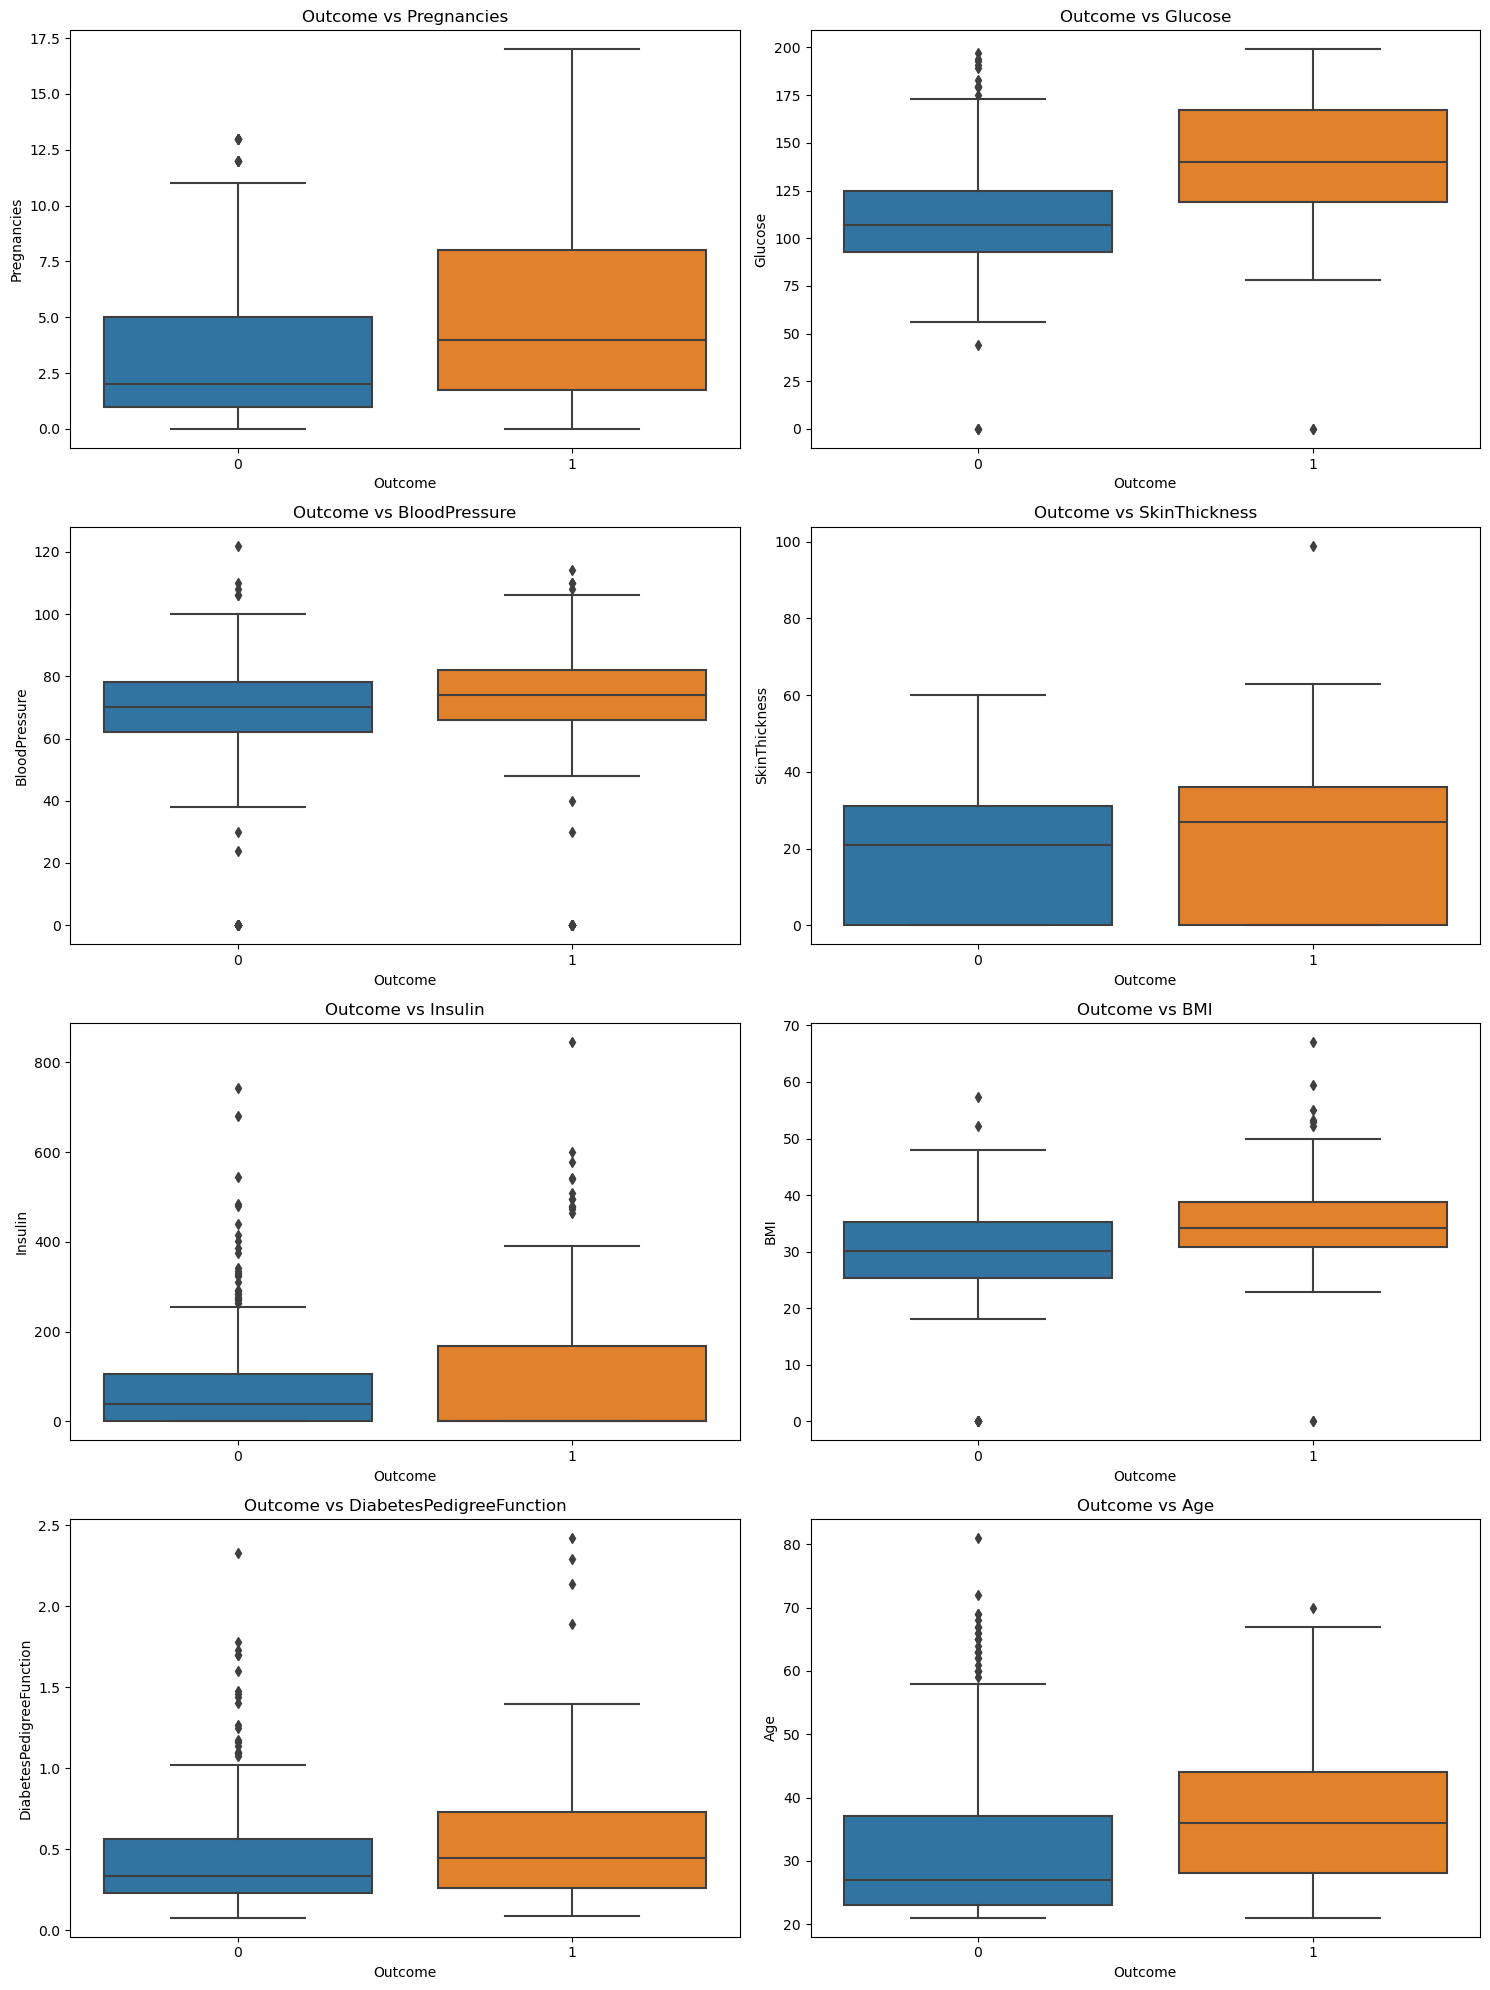

In [15]:
# create boxplot for all the features w.r.t Outcome (0 and 1) to check the distribution of data

plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.boxplot(data=df,x='Outcome',y='Pregnancies')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.boxplot(data=df,x='Outcome',y='Glucose')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.boxplot(data=df,x='Outcome',y='BloodPressure')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.boxplot(data=df,x='Outcome',y='SkinThickness')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.boxplot(data=df,x='Outcome',y='Insulin')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.boxplot(data=df,x='Outcome',y='BMI')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.boxplot(data=df,x='Outcome',y='DiabetesPedigreeFunction')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.boxplot(data=df,x='Outcome',y='Age')
plt.title('Outcome vs Age')

plt.tight_layout()

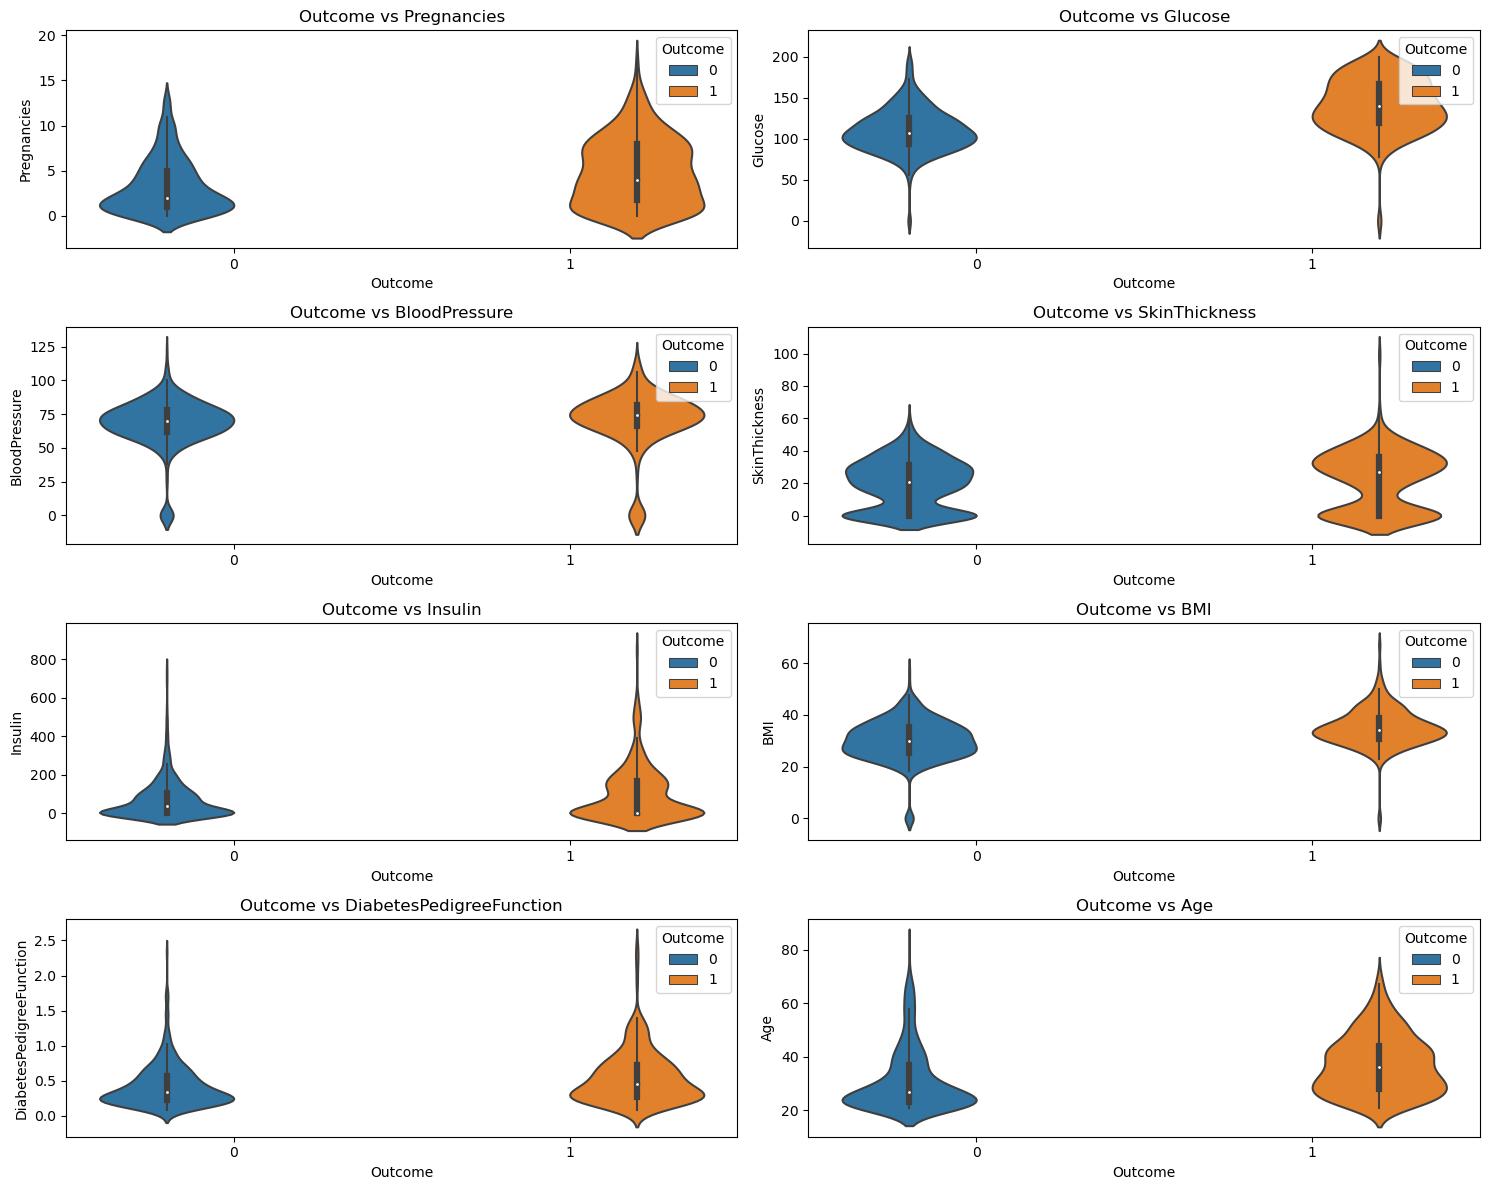

In [16]:
# create violineplot for all the features w.r.t Outcome (0 and 1) to check the data distribution

plt.figure(figsize=(15,12))

plt.subplot(4,2,1)
sns.violinplot(data=df,x='Outcome',y='Pregnancies',hue='Outcome')
plt.title('Outcome vs Pregnancies')

plt.subplot(4,2,2)
sns.violinplot(data=df,x='Outcome',y='Glucose',hue='Outcome')
plt.title('Outcome vs Glucose')

plt.subplot(4,2,3)
sns.violinplot(data=df,x='Outcome',y='BloodPressure',hue='Outcome')
plt.title('Outcome vs BloodPressure')

plt.subplot(4,2,4)
sns.violinplot(data=df,x='Outcome',y='SkinThickness',hue='Outcome')
plt.title('Outcome vs SkinThickness')

plt.subplot(4,2,5)
sns.violinplot(data=df,x='Outcome',y='Insulin',hue='Outcome')
plt.title('Outcome vs Insulin')

plt.subplot(4,2,6)
sns.violinplot(data=df,x='Outcome',y='BMI',hue='Outcome')
plt.title('Outcome vs BMI')

plt.subplot(4,2,7)
sns.violinplot(data=df,x='Outcome',y='DiabetesPedigreeFunction',hue='Outcome')
plt.title('Outcome vs DiabetesPedigreeFunction')

plt.subplot(4,2,8)
sns.violinplot(data=df,x='Outcome',y='Age',hue='Outcome')
plt.title('Outcome vs Age')

plt.tight_layout()

In [17]:
# correlation in the dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

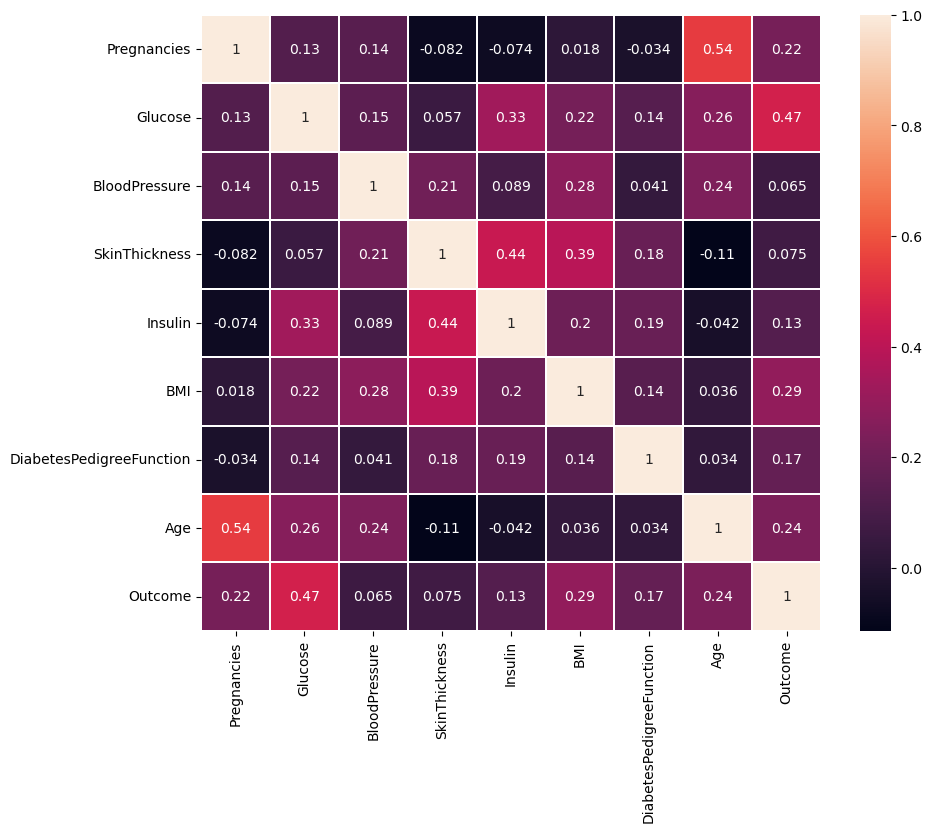

In [18]:
# create a heatmap to visualize the correlation between features with each other
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2)

# Data Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler_feat = scaler.fit_transform(df.drop('Outcome',axis=1))

In [21]:
df_feat = pd.DataFrame(scaler_feat,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# separate the features

# X have the features which contain data columns to train and test the model
X = df_feat

# y have the features which contain outcome of the data model
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X Train:',X_train.shape)
print('X Test:',X_test.shape)
print('Y Train:',y_train.shape)
print('Y Test:',y_test.shape)

X Train: (537, 8)
X Test: (231, 8)
Y Train: (537,)
Y Test: (231,)


# Logistic Regression

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# create an instance for the ml algorithm (Logistic Regression)
lr = LogisticRegression()

# fit the training data to the model
lr.fit(X_train,y_train)

# predict the outcomes from the model
lr_pred = lr.predict(X_test)

In [27]:
# check the classification report (performance of the model) like- accuracy, f1 score, recall, precision
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

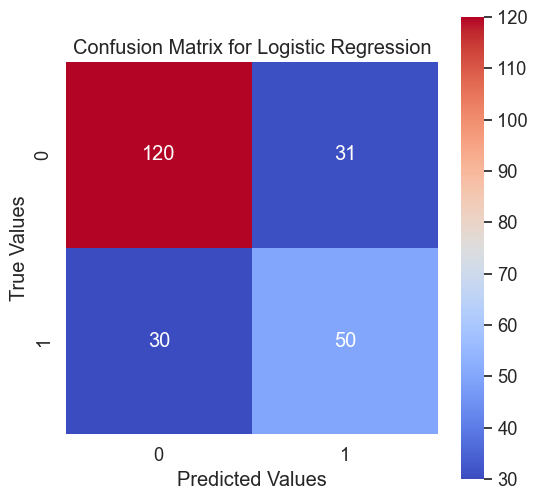

In [28]:
# create an instance of the confusion matrix
cm = confusion_matrix(y_test,lr_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
# create a heatmap which show the confusion matrix of Logistic Reg. model
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Logistic Regression') # title of the confusion matrix

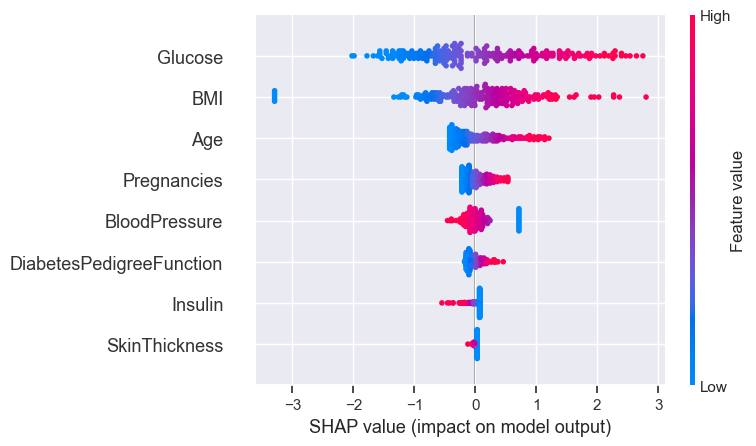

In [29]:
# shap is used to check the most important or importance of features for the logistic reg. model
plt.figure(figsize=(12,8))
masker = shap.maskers.Independent(data = X_train)
explainer_of_dtc = shap.LinearExplainer(lr,masker=masker)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

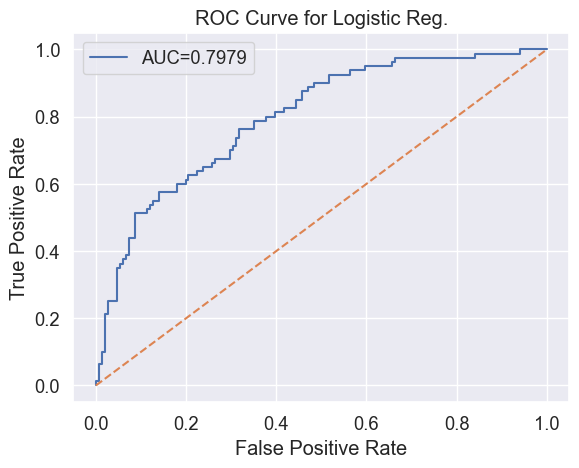

In [30]:
# create a ROC Curve and AUC plot to assess the overall diagnostic performance of a test and to compare the performance of
# two or more diagnostic tests.

lr_pred_prob = lr.predict_proba(X_test)[:][:,1]

lr_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(lr_pred_prob,columns=['y pred prob'])],axis=1)
lr_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])
auc = roc_auc_score(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
# create an instance for the decision tree ml algorithm
dtc = DecisionTreeClassifier()

# fit the data into the model
dtc.fit(X_train,y_train)

# predict the outcomes by input the X_test data
dtc_pred = dtc.predict(X_test)

In [33]:
# check the classification report (performance of the  decision tree model) like- accuracy, f1 score, recall, precision
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       151
           1       0.57      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.71      0.72       231



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

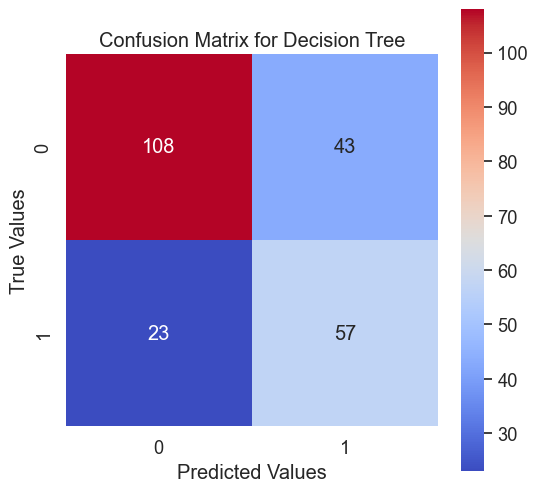

In [34]:
# create an instance for the decision tree confusion matrix
dtc_cm = confusion_matrix(y_test,dtc_pred)

# adjust the size of the confusion matrix heatmap 
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

#create a heatmap which show the confusion matrix of the decision tree model
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Decision Tree') # title of the confusion matrix

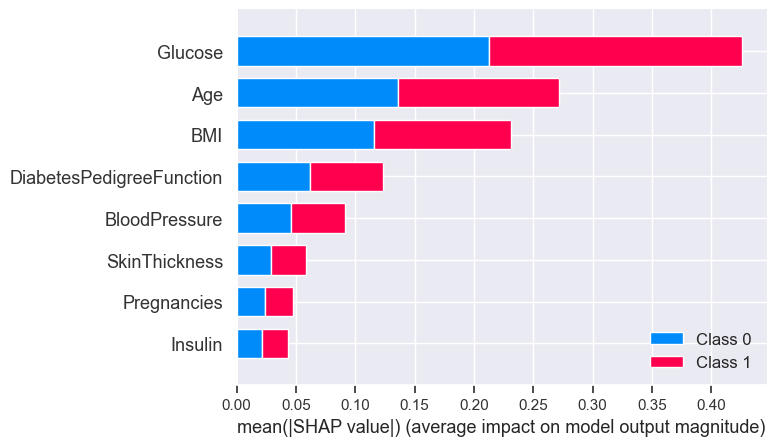

In [35]:
# shap plot for the decision tree model
explainer_of_dtc = shap.TreeExplainer(dtc)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

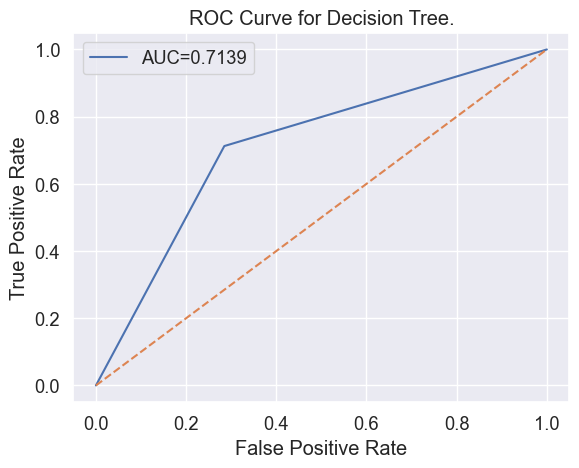

In [36]:
# ROC and AUC Plot for the decision tree model
dtc_pred_prob = dtc.predict_proba(X_test)[:][:,1]

dtc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(dtc_pred_prob,columns=['y pred prob'])],axis=1)
dtc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(dtc_actual_predict['y actual'],dtc_actual_predict['y pred prob'])
auc = roc_auc_score(dtc_actual_predict['y actual'],dtc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree.')
plt.legend()

# Random Forest 

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# create an instance for the random forest ml algorithm
rfc = RandomForestClassifier(n_estimators=200) # choose 'n_estimators' parameter on your own wise

# fit the train and test data into the model
rfc.fit(X_train,y_train)

# predict the outcomes
rfc_pred = rfc.predict(X_test)

In [39]:
# check the classification report (performance of the  random forest model) like- accuracy, f1 score, recall, precision
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

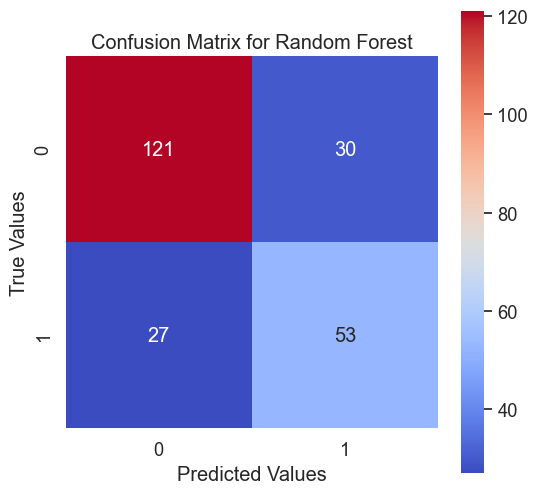

In [40]:
# create an instance for the random forest confusion matrix
rfc_cm = confusion_matrix(y_test,rfc_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the random forest model
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Random Forest') # title of the confusion matrix

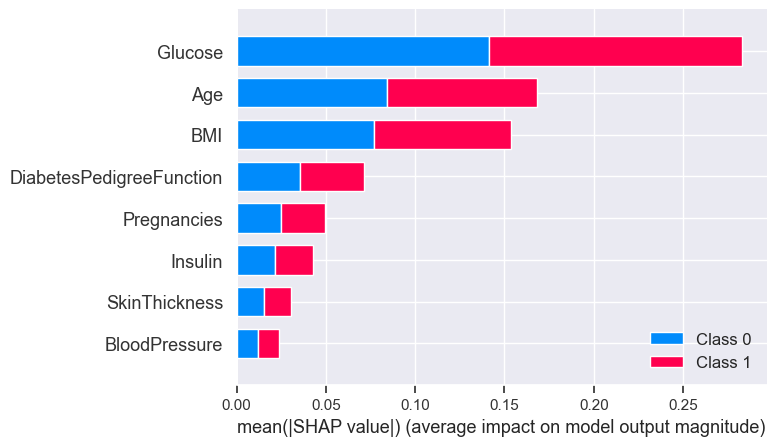

In [41]:
# shap plot for the random forest model
explainer_of_dtc = shap.TreeExplainer(rfc)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

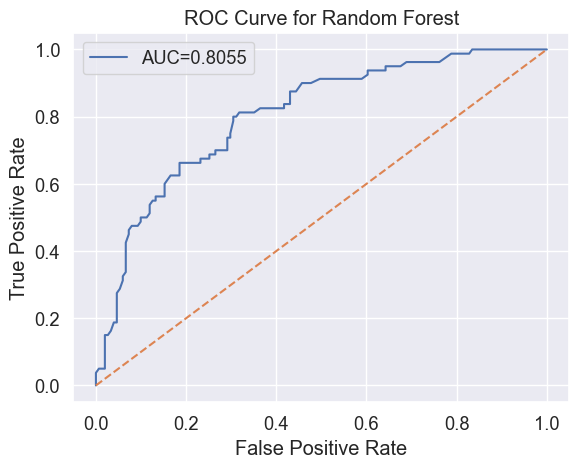

In [42]:
# ROC and AUC for the random forest model
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]

rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(rfc_pred_prob,columns=['y pred prob'])],axis=1)
rfc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])
auc = roc_auc_score(rfc_actual_predict['y actual'],rfc_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()

# Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC

In [44]:
# create an instance for the SVM ml algorithm
svm = SVC(probability=True)

# fit the train and test data into the algorithm
svm.fit(X_train,y_train)

# predict the outcomes by input the X_test data into model
svm_pred = svm.predict(X_test)

In [45]:
# check the classification report (performance of the SVM model) like- accuracy, f1 score, recall, precision
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Text(0.5, 1.0, 'Confusion Matrix for SVM')

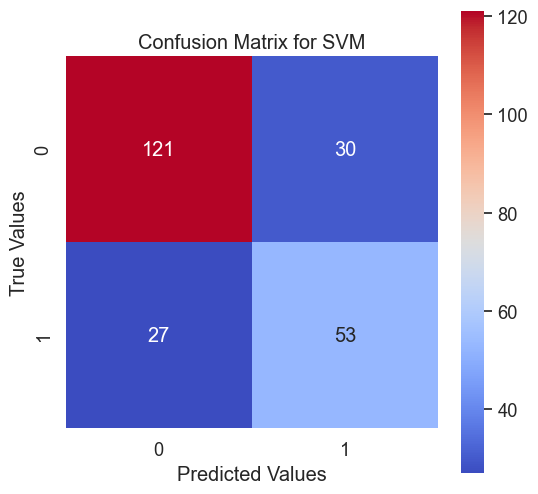

In [46]:
# create an instance for the SVM confusion matrix
svm_cm = confusion_matrix(y_test,rfc_pred)

# adjust the size of the confusion matrix 
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the SVM model
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for SVM') # title of the confusion matrix

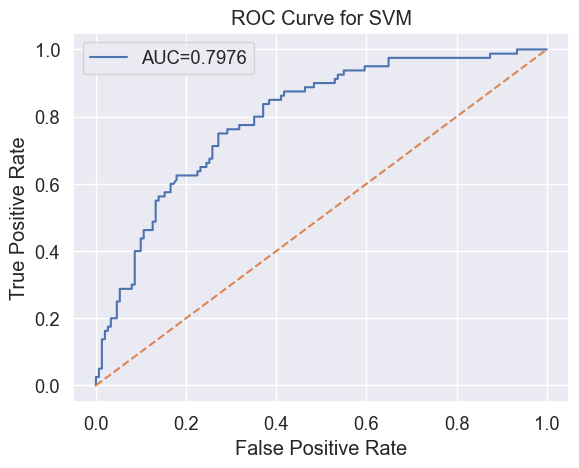

In [47]:
# ROC and AUC for the SVM model
svm_pred_prob = svm.predict_proba(X_test)[:][:,1]

svm_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(svm_pred_prob,columns=['y pred prob'])],axis=1)
svm_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])
auc = roc_auc_score(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()

# K Nearest Neighbor (KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# create an instance for the KNN ml algorithm
knn = KNeighborsClassifier()

# fit the train and test data into the algorithm
knn.fit(X_train,y_train)

# predict the outcomes by input the X_test into the model
knn_pred = knn.predict(X_test)

In [50]:
# check the classification report (performance of the KNN model) like- accuracy, f1 score, recall, precision
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



Text(0.5, 1.0, 'Confusion Matrix for KNN')

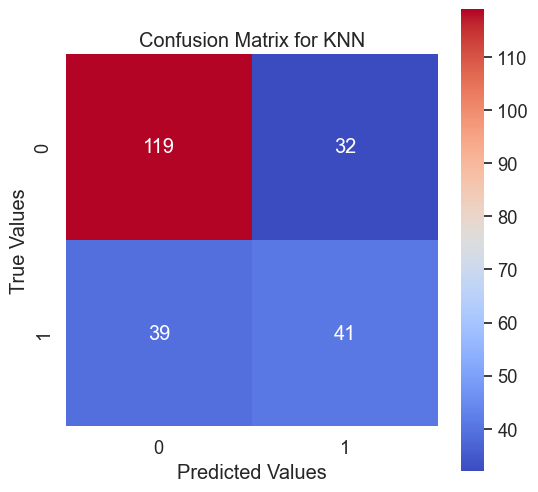

In [51]:
# create an instance for the SVM confusion matrix
knn_cm = confusion_matrix(y_test,knn_pred)

# ajust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the KNN model
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for KNN') # title of the confusion matrix

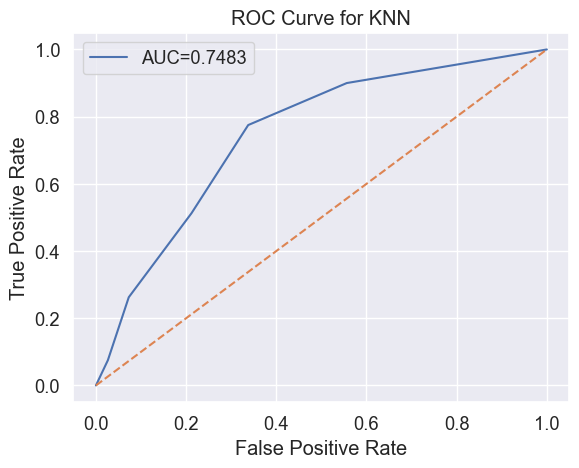

In [52]:
# ROC and AUC for the KNN model
knn_pred_prob = knn.predict_proba(X_test)[:][:,1]

knn_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(knn_pred_prob,columns=['y pred prob'])],axis=1)
knn_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(knn_actual_predict['y actual'],knn_actual_predict['y pred prob'])
auc = roc_auc_score(knn_actual_predict['y actual'],knn_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()

# Accuracy Score Comparison between All Models

In [53]:
print('Accuracy Score of Logistic Reg. : {:.2f}%'.format(accuracy_score(y_test,lr_pred)*100))
print('Accuracy Score of Decision Tree : {:.2f}%'.format(accuracy_score(y_test,dtc_pred)*100))
print('Accuracy Score of Random Forest : {:.2f}%'.format(accuracy_score(y_test,rfc_pred)*100))
print('Accuracy Score of SVM           : {:.2f}%'.format(accuracy_score(y_test,svm_pred)*100))
print('Accuracy Score of K N Neighbors : {:.2f}%'.format(accuracy_score(y_test,knn_pred)*100))

Accuracy Score of Logistic Reg. : 73.59%
Accuracy Score of Decision Tree : 71.43%
Accuracy Score of Random Forest : 75.32%
Accuracy Score of SVM           : 74.89%
Accuracy Score of K N Neighbors : 69.26%


# Conclusion 

Hence, Random Foest Model gives us much better accuracy score (75.32%) as compare to other models. So, we can say that in future to predict that the patient have diabetes or not, we will use Random Forest Model to predict most accurate prediction.

# Saving Random Forest Model

In [54]:
import pickle

In [56]:
# use dump() function to save the model with pickle
save_rfc_model = pickle.dumps(rfc)

# use load() function to loading the saved model
rfc_from_pickle = pickle.loads(save_rfc_model)

# after loading, use test data to predict the outcome
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
rfc_from_pickle.predict([[0,137,40,35,168,43.1,2.228,33]])

array([1], dtype=int64)

In [61]:
with open('rfc_pickle.pkl', 'wb') as file:
    pickle.dump(rfc_from_pickle, file)